In [84]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *

In [27]:
farsData = pd.read_csv('FARS.csv')

In [28]:
fars_modelyr = pd.Series(farsData.loc[:, 'modelyr'], dtype = 'category')
fars_modelyr.head(10)

0    1991
1    1987
2    1983
3    1997
4    1998
5    1991
6    1995
7    1984
8    1991
9    1988
Name: modelyr, dtype: category
Categories (77, int64): [1924, 1927, 1928, 1929, ..., 2009, 2010, 2011, 9999]

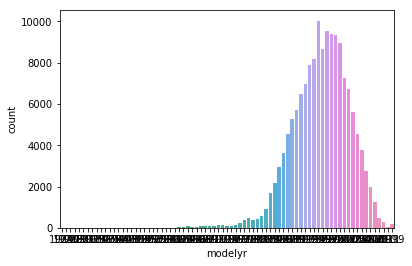

In [4]:
sns.countplot(x = fars_modelyr)

In [5]:
%matplotlib inline

In [54]:
y = fars_modelyr[fars_modelyr.isin(list(fars_modelyr.value_counts()[0:25].index))]

[Text(0,0.5,'Frequency \n'), Text(0.5,0,'Model Year')]

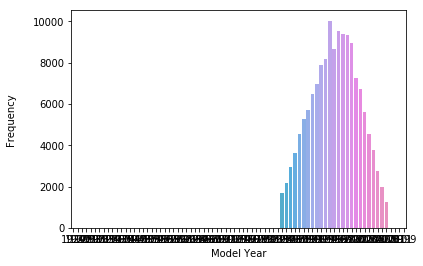

In [30]:
sns.countplot(x = y).set(xlabel='Model Year', ylabel='Frequency \n')

In [59]:
y = y.cat.remove_unused_categories()
y = y.cat.as_ordered()

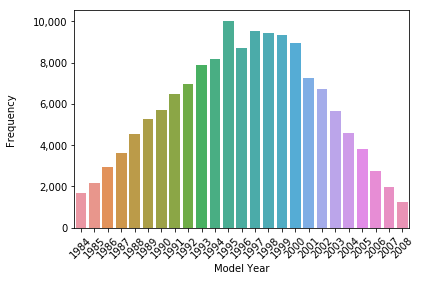

In [93]:
from pylab import savefig
barplot = sns.countplot(x = y).set(xlabel='Model Year', ylabel='Frequency \n')
plt.xticks(rotation = 45)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

savefig("output.pdf")

In [61]:
df = pd.DataFrame(y)
df.head(10)
df = df.reset_index()
df.head(10)

,index,modelyr
0,0,1991
1,1,1987
2,3,1997
3,4,1998
4,5,1991
5,6,1995
6,7,1984
7,8,1991
8,9,1988
9,11,1996


In [108]:
h = ggplot(aes(x = 'modelyr'), data = df) + geom_histogram(binwidth = 1) + scale_y_continuous(labels = 'comma') 

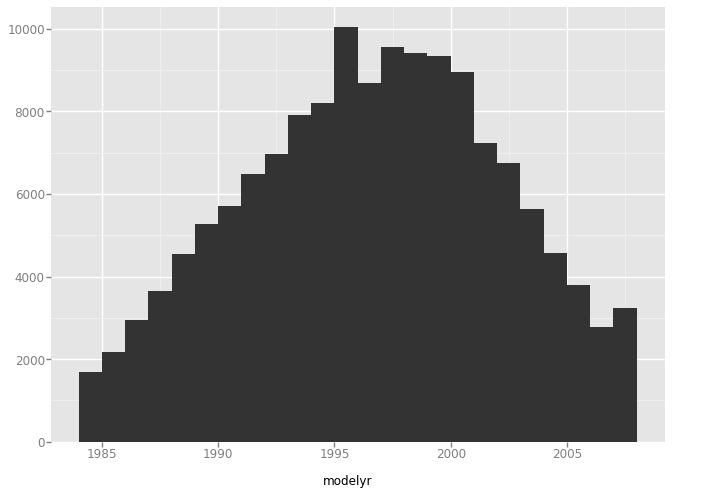

<ggplot: (-9223372029291056391)>


In [111]:
print(h)